<a href="https://colab.research.google.com/github/bchuchucaa/RNNConsumoDeAgua/blob/main/MWaterConsuptionUsingPCA_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip3 install pandas
!pip3 install sklearn
!pip install tensorflow==2.7.0
!pip3 install matplotlib




ERROR: Operation cancelled by user


In [1]:
from pandas import read_csv
from datetime import datetime
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import model_from_json
from sklearn.metrics import mean_squared_error
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import scale 
from sklearn.preprocessing import OneHotEncoder

from matplotlib import pyplot


from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print('LIBRERIAS IMPORTADAS')

LIBRERIAS IMPORTADAS


In [3]:
#LOADING DATA 
number_of_samples=int(input("INGRESE EL NUMERO DE MUESTRAS"))
df= read_csv('/content/AguaH.csv')
df = df.iloc[0:number_of_samples , :]
#AJUSTE DEL FORMATO DE LAS FECHAS 
lookup = {'ENE':'01','FEB':'02','MAR':'03','ABR':'04','MAY':'05','JUN':'06','JUL':'07','AGO':'08','SEP':'09','OCT':'10','NOV':'11','DIC':'12'}
clist=[]
for col in df.columns[5:]:
    col = col[4:].split('_')
    clist.append('20'+col[1]+'-'+lookup[col[0]]+'-01')

columns = ['LANDUSE_TYPE','USER','PIPE DIAM','VENDOR','JAN16']+clist
df.columns=columns
df = df.drop(columns=['LANDUSE_TYPE','PIPE DIAM','VENDOR','JAN16'])
#ESTE CODIGO SIRVE UNICAMENTE PARA LA INTEGRACION DE LOS NOMBRES EN EL DATAFRAME
names = pd.read_csv("/content/StateNames.csv", usecols=["Name"])
names = names.iloc[0:number_of_samples , :]
#ELIMINAMOS LA COLUMNA DE LOS NOMBRE YA QUE SE BINARIZARON
print("Names shape ",names.shape)
df.insert(1, 'Names', names.values)
print("Dataframe shape ",df.shape)
#AJUSTE DEL DATASET EN EL FORMATO SOLICITADO 
rows_list=[]
for column in range(2,len(df.columns),1):
  selection=df.iloc[:,column]
  for row in range(len(selection)):
    df2=[df.columns[column],df.iloc[row,1],df.iloc[row,0],selection.iloc[row]]
    rows_list.append(df2)
    
dataComp = pd.DataFrame(rows_list)  
dataComp.head()

INGRESE EL NUMERO DE MUESTRAS5000
Names shape  (5000, 1)
Dataframe shape  (5000, 86)


,0,1,2,3
0,2009-01-01,Mary,DOMESTICO MEDIO,20.0
1,2009-01-01,Annie,DOMESTICO MEDIO,NaN
2,2009-01-01,Anna,DOMESTICO RESIDENCIAL,NaN
3,2009-01-01,Margaret,DOMESTICO MEDIO,NaN
4,2009-01-01,Helen,DOMESTICO RESIDENCIAL,20.0


In [4]:
dataComp.rename(columns = {0:'DATE',1:'NOMBRE',2:'TIPO',3:'CONSUMO'}, inplace = True)
dataComp['DATE'] = pd.to_datetime(dataComp['DATE'], format='%Y-%m-%d')
dataComp=dataComp.set_index('DATE')
#RANGO DE FECHAS DE LAS MUESTRAS
print(dataComp.index.min())
print(dataComp.index.max())
#CANTIDAD DE MUESTRAS POR ANIO
print(len(dataComp['2009']))
#DESCRIPCION DEL DATASET
print(dataComp.describe())

2009-01-01 00:00:00
2015-12-01 00:00:00
60000
             CONSUMO
count  323059.000000
mean       94.573140
std      1032.767218
min         0.000000
25%         9.000000
50%        15.000000
75%        22.000000
max    100302.000000


In [17]:
#RELLENANDO VALORES NAN POR LA MEDIA
dataComp=dataComp.fillna(dataComp['CONSUMO'].mean())
dataComp.to_csv('datasetPreprocesado.csv')
salida=dataComp["CONSUMO"]
dataComp = dataComp.drop('CONSUMO',axis = 1)
dataComp.head()

KeyError: ignored

In [6]:
# Create a categorical boolean mask
categorical_feature_mask = dataComp.dtypes == object
# Filter out the categorical columns into a list for easy reference later on in case you have more than a couple categorical columns
categorical_cols = dataComp.columns[categorical_feature_mask].tolist()

# Instantiate the OneHotEncoder Object
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)
dataComp['TIPO'] = dataComp['TIPO'].astype(str)
dataComp['NOMBRE'] = dataComp['NOMBRE'].astype(str)

# Apply ohe on data
ohe.fit(dataComp[categorical_cols])
cat_ohe = ohe.transform(dataComp[categorical_cols])

#Create a Pandas DataFrame of the hot encoded column
ohe_df = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names(input_features = categorical_cols))
#concat with original data and drop original columns


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
#PCA Projection to 2D
from sklearn.decomposition import PCA
num_components=5
columnas=['PC1','PC2','PC3','PC4','PC5']
pca = PCA(num_components)
principalComponents = pca.fit_transform(ohe_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = columnas)
principalDf=round(principalDf, 2)
print(principalDf)

         PC1   PC2   PC3   PC4   PC5
0      -0.52 -0.09 -0.02 -0.02  0.71
1      -0.51 -0.09 -0.02  0.00  0.00
2       0.86 -0.39 -0.06 -0.04  0.01
3      -0.51 -0.08 -0.02 -0.01 -0.70
4       0.87 -0.40 -0.06 -0.04 -0.03
...      ...   ...   ...   ...   ...
419995 -0.51 -0.09 -0.02 -0.00 -0.00
419996 -0.52 -0.09 -0.02 -0.01 -0.00
419997 -0.51 -0.09 -0.02 -0.01 -0.00
419998  0.87 -0.39 -0.05 -0.03  0.00
419999 -0.52 -0.09 -0.02 -0.01 -0.00

[420000 rows x 5 columns]


In [8]:
principalDf.index= salida.index
principalDf.insert(loc=5, column='CONSUMO', value=salida)
principalDf.head() 

,PC1,PC2,PC3,PC4,PC5,CONSUMO
DATE,,,,,,
2009-01-01,-0.52,-0.09,-0.02,-0.02,0.71,20.00000
2009-01-01,-0.51,-0.09,-0.02,0.00,0.00,94.57314
2009-01-01,0.86,-0.39,-0.06,-0.04,0.01,94.57314
2009-01-01,-0.51,-0.08,-0.02,-0.01,-0.70,94.57314
2009-01-01,0.87,-0.40,-0.06,-0.04,-0.03,20.00000


In [9]:
# reshape 1d arrays to 2d arrays
scaler = MinMaxScaler(feature_range=(0, 1))
principalDf = scaler.fit_transform(principalDf.values) 

In [10]:
principalDf=pd.DataFrame(principalDf)

In [11]:
principalDf.rename(columns = {0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5',5:'CONSUMO'}, inplace = True)


In [12]:
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,CONSUMO
0,0.000000,0.244094,0.355072,0.215385,0.993007,0.000199
1,0.007194,0.244094,0.355072,0.230769,0.496503,0.000943
2,0.992806,0.007874,0.326087,0.200000,0.503497,0.000943
3,0.007194,0.251969,0.355072,0.223077,0.006993,0.000943
4,1.000000,0.000000,0.326087,0.200000,0.475524,0.000199


In [13]:
#Split en x, y
y=principalDf['CONSUMO']
dataset=principalDf.drop(['CONSUMO'], axis=1)
x=dataset
values = dataset.values
x

,PC1,PC2,PC3,PC4,PC5
0,0.000000,0.244094,0.355072,0.215385,0.993007
1,0.007194,0.244094,0.355072,0.230769,0.496503
2,0.992806,0.007874,0.326087,0.200000,0.503497
3,0.007194,0.251969,0.355072,0.223077,0.006993
4,1.000000,0.000000,0.326087,0.200000,0.475524
...,...,...,...,...,...
419995,0.007194,0.244094,0.355072,0.230769,0.496503
419996,0.000000,0.244094,0.355072,0.223077,0.496503
419997,0.007194,0.244094,0.355072,0.223077,0.496503
419998,1.000000,0.007874,0.333333,0.207692,0.496503


In [14]:
##red neuronal estandar
numregistros=values.shape[0]
print(numregistros)

# split en conjuntos de train y test
n_train = int(round(numregistros*0.8,0)) #80% para entrenamiento
train_X = values[:n_train, :]
test_X = values[n_train:, :]
train_y = y[:n_train]
test_y = y[n_train:]

# reshape entrada a 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

420000
(336000, 1, 5) (336000,) (84000, 1, 5) (84000,)


Epoch 1/20
16800/16800 - 45s - loss: 0.0017 - val_loss: 1.5156e-04 - 45s/epoch - 3ms/step
Epoch 2/20
16800/16800 - 32s - loss: 1.2350e-04 - val_loss: 1.1327e-04 - 32s/epoch - 2ms/step
Epoch 3/20
16800/16800 - 30s - loss: 1.0165e-04 - val_loss: 1.0250e-04 - 30s/epoch - 2ms/step
Epoch 4/20
16800/16800 - 31s - loss: 9.3712e-05 - val_loss: 9.7683e-05 - 31s/epoch - 2ms/step
Epoch 5/20
16800/16800 - 29s - loss: 8.9692e-05 - val_loss: 9.5039e-05 - 29s/epoch - 2ms/step
Epoch 6/20
16800/16800 - 30s - loss: 8.7299e-05 - val_loss: 9.3402e-05 - 30s/epoch - 2ms/step
Epoch 7/20
16800/16800 - 29s - loss: 8.5731e-05 - val_loss: 9.2315e-05 - 29s/epoch - 2ms/step
Epoch 8/20
16800/16800 - 30s - loss: 8.4639e-05 - val_loss: 9.1547e-05 - 30s/epoch - 2ms/step
Epoch 9/20
16800/16800 - 29s - loss: 8.3831e-05 - val_loss: 9.0978e-05 - 29s/epoch - 2ms/step
Epoch 10/20
16800/16800 - 29s - loss: 8.3216e-05 - val_loss: 9.0551e-05 - 29s/epoch - 2ms/step
Epoch 11/20
16800/16800 - 29s - loss: 8.2740e-05 - val_loss: 9.

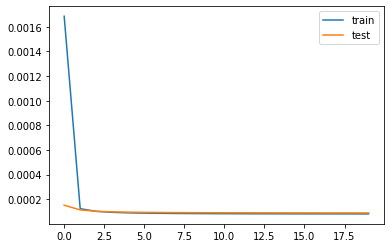

In [15]:
# Diseño pca de la red recurrente LSTM
model = Sequential()
model.add(LSTM(12, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(32))
model.add(Dense(9))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mse', optimizer='sgd')
# entrenar red
history = model.fit(train_X, train_y, epochs=20, batch_size=20, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [16]:
pred_y= model.predict(test_X)
MAE=metrics.mean_absolute_error(test_y,pred_y)
MSE=metrics.mean_squared_error(test_y,pred_y)
RMSE=np.sqrt(metrics.mean_squared_error(test_y,pred_y))
#accuracy=str(accuracy_score(test_y,pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)
print('Mean Squared Error (MSE):', MSE)
print('Root Mean Squared Error (RMSE):', RMSE) 
#print('Accuracy: ' + accuracy) 


Mean Absolute Error (MAE): 0.0027
Mean Squared Error (MSE): 0.0001
Root Mean Squared Error (RMSE): 0.0094


In [72]:
validation_df = pd.DataFrame({'Real': test_y.values})
validation_df.insert(1, 'Prediccion', pred)

In [73]:
validation_df.tail(20)

,Real,Prediccion
83980,0.000060,0.003125
83981,0.000219,0.003125
83982,0.000199,0.003121
83983,0.000030,0.003121
83984,0.000000,0.002789
83985,0.000189,0.003120
83986,0.000060,0.003121
83987,0.000219,0.003121
83988,0.000179,0.003118
83989,0.000219,0.003125


In [80]:
scale=MinMaxScaler()
scale.min_,scale.scale_=scaler.min_[0],scaler.scale_[0]

In [ ]:
train=copy.deepcopy(dataframe)
test=copy.deepcopy(Y)


#Notemos que se incluyen los mejores parámetros del paso de optimización anterior (batch_size, epochs y optimizer)
def build_model(l1,l2,l3):
    model = Sequential()
    model.add(Dense(l1, input_shape=(cantidadVariablesIndependientes,), activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(l2, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(l3, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['acc'])
    return model


l1=[2,4,8,16,32,64,96,128,160,192,224,256,512]
l2=[2,4,8,16,32,64,96,128,160,192,224,256,512]
l3=[2,4,8,16,32,64,96,128,160,192,224,256,512]
parameters = parameters = {'modelNN__l1':l1,
                           'modelNN__l2':l2,
                           'modelNN__l3':l3}


estimator = KerasClassifier(build_fn=build_model, verbose=0, batch_size=70, epochs=30)


pipe.steps.append(['modelNN',estimator])


tic = time()


grid_search = GridSearchCV(estimator=pipe, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_result = grid_search.fit(train, test)


#Algunos resultados:
#Adam: Best: 0.765000 using {'modelNN__l1': 16, 'modelNN__l2': 32, 'modelNN__l3': 192}
#Rmsprop: Best: 0.770000 using {'modelNN__l1': 16, 'modelNN__l2': 128, 'modelNN__l3': 256}
#Adam: Best: 0.771000 using {'modelNN__l1': 64, 'modelNN__l2': 2, 'modelNN__l3': 64}


gs_time1 = time() - tic
print('Tiempo en segundos: ',gs_time1)
tiempoTotal=GetTime(gs_time1)
print('Tiempo: ',tiempoTotal)


gs2=grid_result